In [1]:
from gsmmutils import DATA_PATH
from gsmmutils.dynamic.sensitivity_analysis import SensitivityAnalysis
from gsmmutils.experimental.ExpMatrix import ExpMatrix
from gsmmutils.graphics.plot import lineplot
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba.xlsx", conditions = "Resume")
analysis = SensitivityAnalysis(matrix)
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")

In [10]:
import sys
sys.path.insert(0, "/opt/src")
from gsmmutils.dynamic.run_dfba import *
initial_parameters = json.load(open(f"{DATA_PATH}/dfba/inputs/initial_parameters.json", "r"))
concentrations_1, trajectories_1 = create_dfba_model("1", initial_parameters, False)
concentrations_1

Loading
Reactions: 3512
Metabolites: 3660
Genes: 1690
Model loaded


KeyboardInterrupt: 

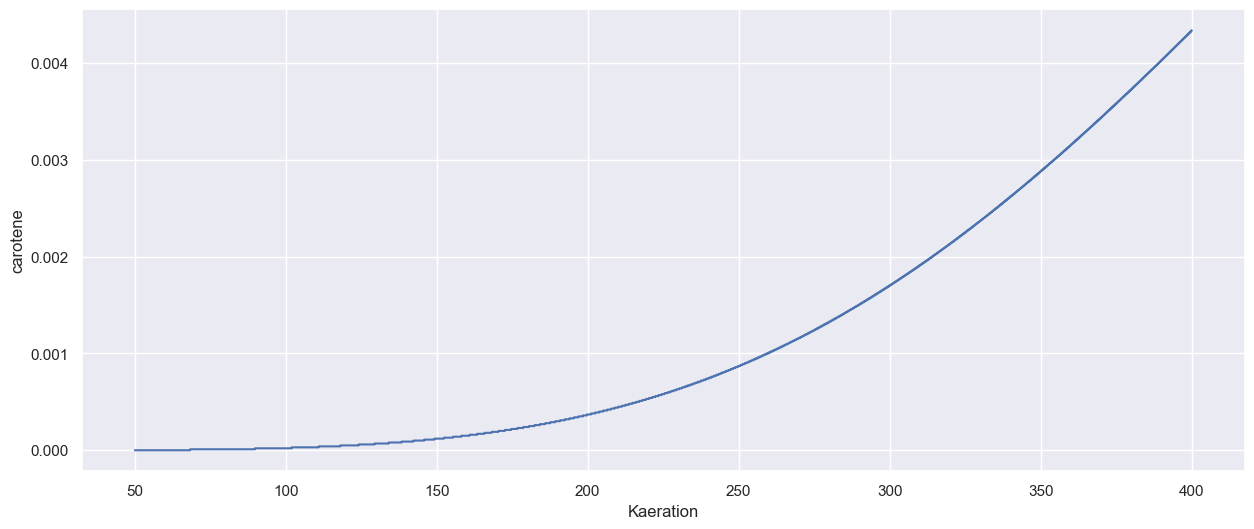

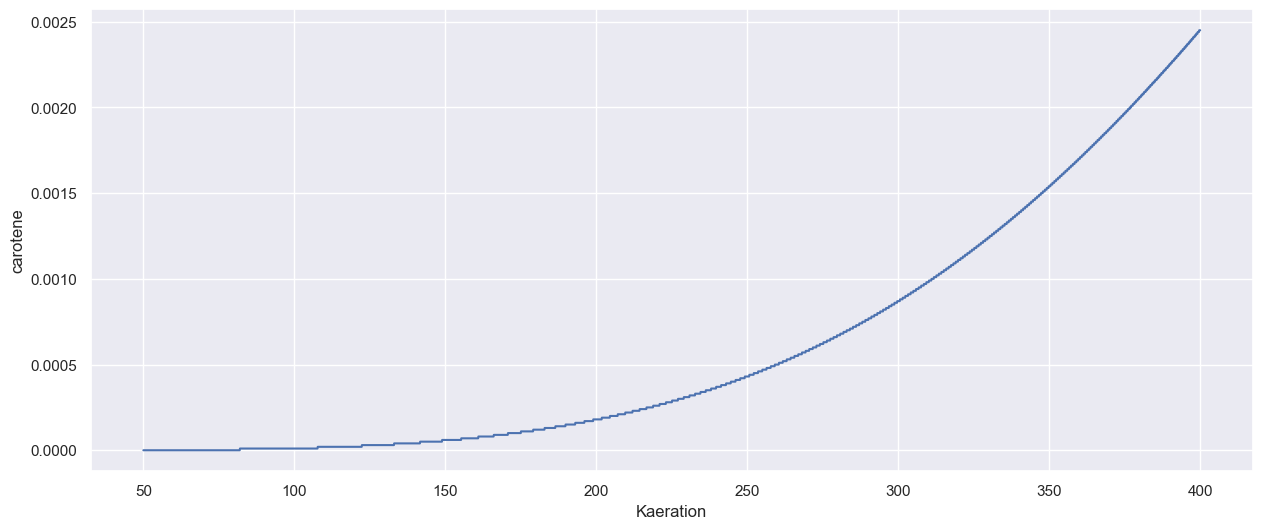

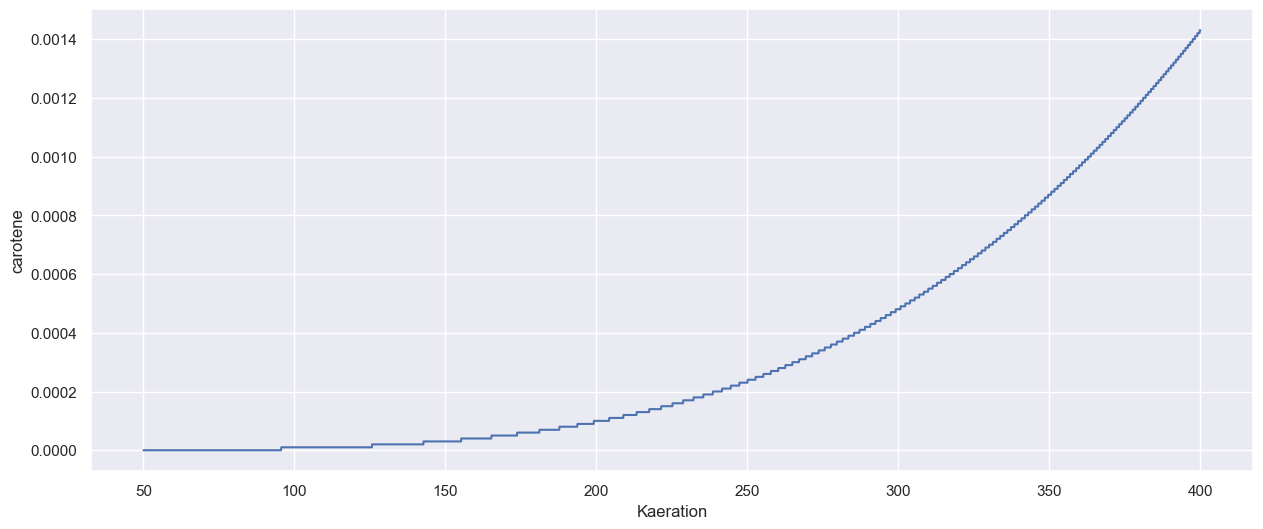

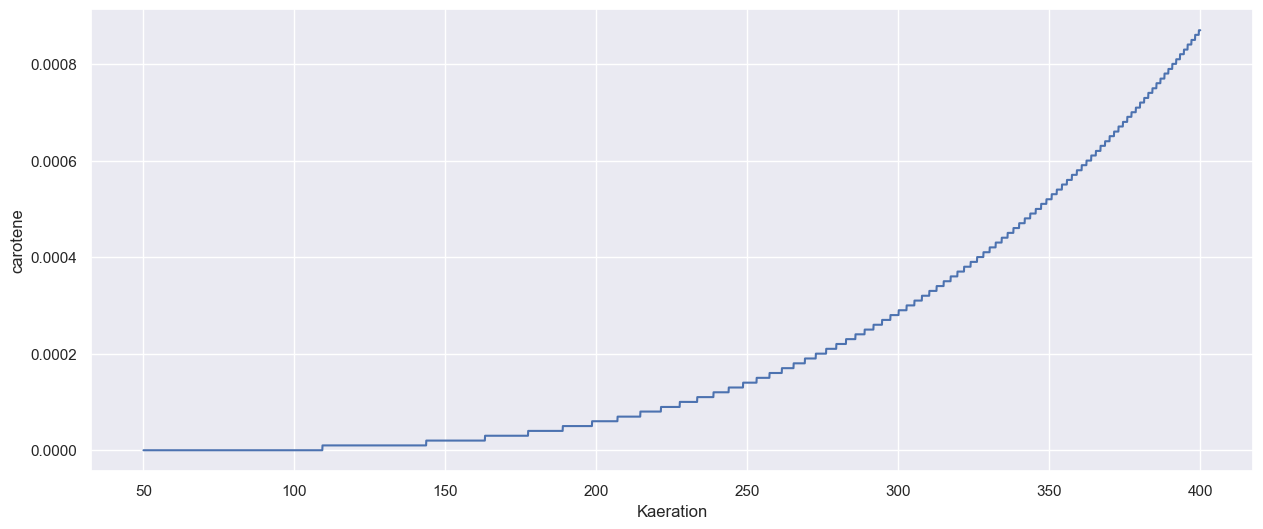

In [22]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
aeration = [500, 600, 700, 800]
complete_results = {}
for value in aeration:
    analysis.parameters["aeration"] = value
    res = analysis.evaluate_dynamic_expression("carotene", "Kaeration", param_range=[50, 400, 100])
    lineplot(list(res.keys()), list(res.values()), xlabel="Kaeration", ylabel="carotene")
    complete_results[value] = res

In [10]:
for key, value in complete_results.items():
    if round(key, 0) == 500:
        at500 = value
    if round(key, 0) == 600:
        at600 = value
    if round(key, 0) == 700:
        at700 = value
    if round(key, 0) == 800:
        at800 = value

In [18]:
at800_at500_ratio = {key: value/at500[key] for key, value in at800.items() if key in at500.keys() and at500[key] != 0}

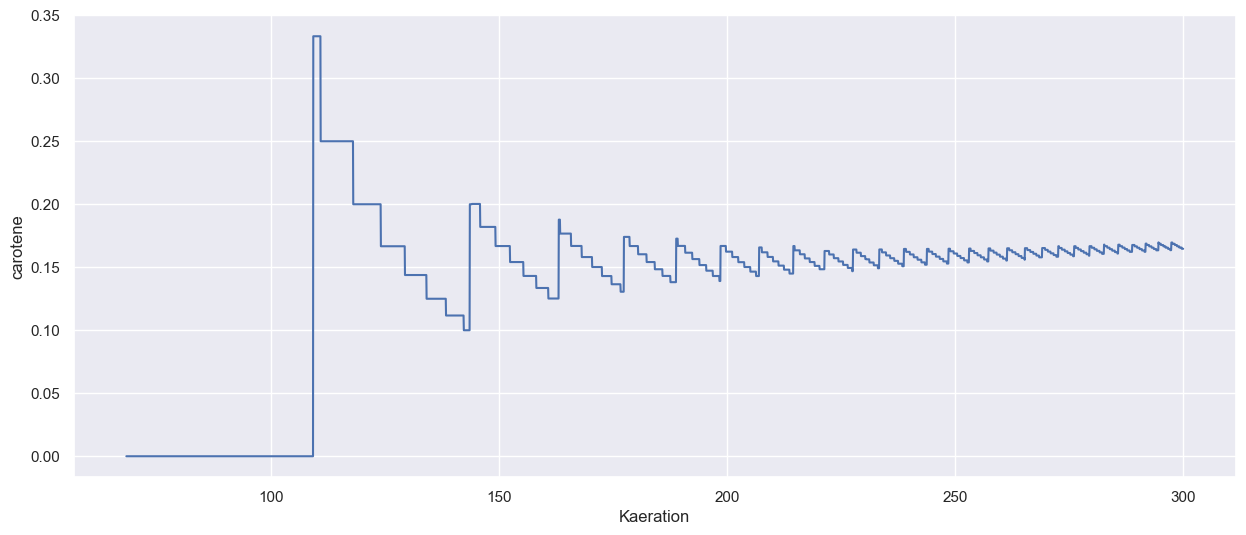

<AxesSubplot:xlabel='Kaeration', ylabel='carotene'>

In [21]:
lineplot(list(at800_at500_ratio.keys()), list(at800_at500_ratio.values()), xlabel="Kaeration", ylabel="carotene")

In [7]:
for key, value in res.items():
    if round(key, 0) == 600:
        at600 = value
    if round(key, 0) == 800:
        at800 = value

In [8]:
print(f"at 600: {at600}")
print(f"at 800: {at800}")
print(f"ratio: {at600/at800}")

at 600: 0.0010199546813964844
at 800: 0.0001100301742553711
ratio: 9.269772481040087


In [5]:
res = analysis.evaluate_dynamic_expression("starch_production", "x_storage")
lineplot(list(res.keys()), list(res.values()), xlabel="x_storage", ylabel="starch_production")

KeyError: 'x_storage'

In [ ]:
res = analysis.evaluate_dynamic_expression("tag", "n_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="n_quota", ylabel="tag")

In [ ]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
res = analysis.evaluate_dynamic_expression("glycerol", "nacl", param_range= [0, 300, 1])
lineplot(list(res.keys()), list(res.values()), xlabel="NaCl", ylabel="glycerol")

In [ ]:
res = analysis.evaluate_dynamic_expression("glycerol", "p_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="p_quota", ylabel="glycerol")

In [ ]:
analysis.load_parameters(f"{DATA_PATH}/dfba/inputs/initial_parameters.json")
res = analysis.evaluate_dynamic_expression("chlorophyll", "Ex0", param_range = [0, 2000, 100])
lineplot(list(res.keys()), list(res.values()), xlabel="Ex0 (mmol_photon/gDW/d)", ylabel="chlorophyll")

In [ ]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "p_quota")
lineplot(list(res.keys()), list(res.values()), xlabel="p_quota", ylabel="chlorophyll")

In [ ]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "n_quota", param_range = [4, 7, 10])
graph  = lineplot(list(res.keys()), list(res.values()), to_show=False, xlabel="n_quota", ylabel="chlorophyll")

In [ ]:
res = analysis.evaluate_dynamic_expression("chlorophyll", "aeration", param_range = [400, 1000, 50])
graph  = lineplot(list(res.keys()), list(res.values()), to_show=False, xlabel="aeration", ylabel="chlorophyll")